____________________
Practice notes from online course: 
[Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/python-for-finance-and-trading-algorithms/learn/v4/content)

### pandas_datareader, series.argmax, pd.concat, scatter_matrix, candlestick_ohlc, pct_change, cumulative return ###
_______________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime

In [31]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)
print(start, end)
# df1 = web.DataReader('TSLA', "morningstar", start, end) 
# Unfortunately, it seems not possible to download 'TSLA' from 'morningstar'. Give-up
# to load the data from downloaded csv file instead
df1 = pd.read_csv("./Tesla_Stock.csv", index_col='Date', parse_dates=True)
df1.head()

2012-01-01 00:00:00 2017-01-01 00:00:00


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [85]:
df2 = web.DataReader('F', "morningstar", start, end)    # sometimes work, often '404 error, not found'

In [86]:
df3 = web.DataReader('GM', "morningstar", start, end)    # sometimes work, often '404 error'

In [88]:
df3.head()

Close   High    Low   Open    Volume
Symbol Date                                            
GM     2012-01-02  20.27  20.27  20.27  20.27         0
       2012-01-03  21.05  21.18  20.75  20.83   9321420
       2012-01-04  21.15  21.37  20.75  21.05   7856752
       2012-01-05  22.17  22.29  20.96  21.10  17884040
       2012-01-06  22.92  23.03  22.24  22.26  18234608

In [89]:
df2.head()

Close   High    Low   Open    Volume
Symbol Date                                            
F      2012-01-02  10.76  10.76  10.76  10.76         0
       2012-01-03  11.13  11.25  10.99  11.00  45709811
       2012-01-04  11.30  11.53  11.07  11.15  79725188
       2012-01-05  11.59  11.63  11.24  11.33  67877467
       2012-01-06  11.71  11.80  11.52  11.74  59840605

In [95]:
print(len(df2.index), df2.index[0], df2.index[1])
print(df2.columns)
df2 = df2.reset_index(level=[0,1]) # have to do reset_index before do set_index, don't know why !!!
df2.head()
df2=df2.set_index('Date')  # have to have same index as df1, to plot them in figure
#df3 = df3.set_index('Date')
#df2.head()
#df3.head()

1305 0 1
Index(['Date', 'Symbol', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [98]:
df3 = df3.reset_index(level=[0,1])
print(df3.head())
df3 = df3.set_index('Date')
#df2.head()
df3.head()

        Date Symbol  Close   High    Low   Open    Volume
0 2012-01-02     GM  20.27  20.27  20.27  20.27         0
1 2012-01-03     GM  21.05  21.18  20.75  20.83   9321420
2 2012-01-04     GM  21.15  21.37  20.75  21.05   7856752
3 2012-01-05     GM  22.17  22.29  20.96  21.10  17884040
4 2012-01-06     GM  22.92  23.03  22.24  22.26  18234608


,Symbol,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-02,GM,20.27,20.27,20.27,20.27,0
2012-01-03,GM,21.05,21.18,20.75,20.83,9321420
2012-01-04,GM,21.15,21.37,20.75,21.05,7856752
2012-01-05,GM,22.17,22.29,20.96,21.10,17884040
2012-01-06,GM,22.92,23.03,22.24,22.26,18234608


_______________________
#### The prices of the 3 stocks ####
can only be plotted in one graph after set all 3 dateframes same index value

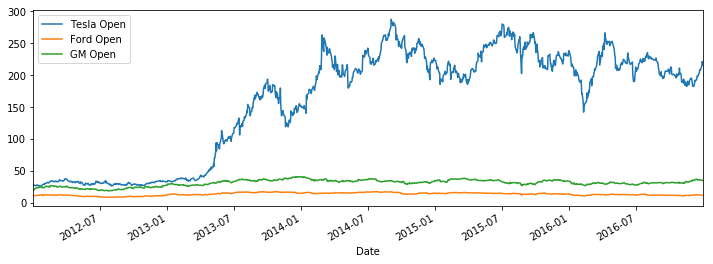

In [101]:
df1['Open'].plot(figsize=(12,4), label='Tesla Open')
df2['Open'].plot(label='Ford Open')
df3['Open'].plot(label='GM Open')
plt.legend()

#### Total traded: ####

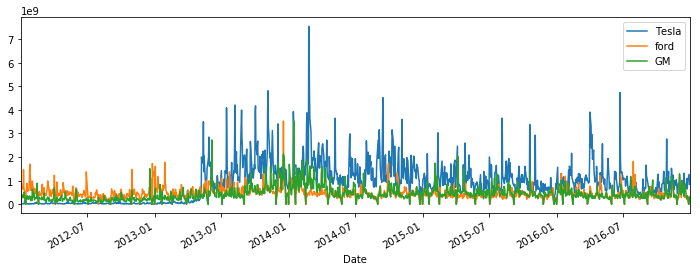

In [102]:
df1['Total Traded'] = df1['Open']*df1['Volume']
df2['Total Traded'] = df2['Open']*df2['Volume']
df3['Total Traded'] = df3['Open']*df3['Volume']
df1['Total Traded'].plot(figsize=(12,4), label='Tesla')
df2['Total Traded'].plot(label='ford')
df3['Total Traded'].plot(label='GM')
plt.legend()

In [103]:
df1['Total Traded'].argmax()

Timestamp('2014-02-25 00:00:00')

### A very special day for Tesla on 2014-02-25 ! ###

__________________
### pd.concat a new dataframe, and pd.plotting scatter_matrix ###

In [104]:
from pandas.plotting import scatter_matrix

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2012-01-02 to 2016-12-30
Freq: B
Data columns (total 3 columns):
Tesla Open    1258 non-null float64
GM Open       1305 non-null float64
Ford Open     1305 non-null float64
dtypes: float64(3)
memory usage: 40.8 KB
None


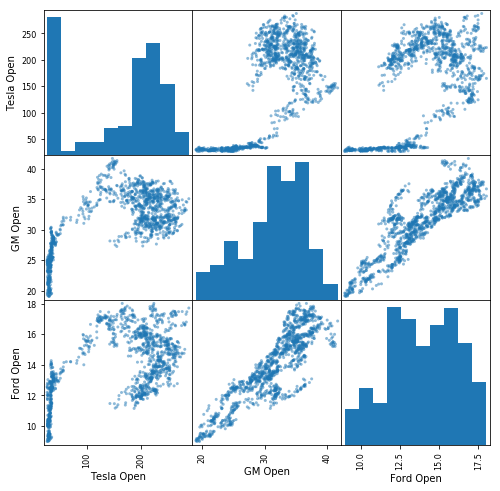

In [106]:
Opens = pd.concat([df1['Open'], df3['Open'], df2['Open']], axis=1)
Opens.columns=['Tesla Open', 'GM Open', 'Ford Open']
print(Opens.info())
scatter_matrix(Opens, alpha=0.5, figsize=(8,8));

____
### First candlestick plot ###

In [111]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
from matplotlib.finance import candlestick_ohlc

In [108]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

In [119]:
date1 = datetime.datetime(2012, 1, 1)
date2 = datetime.datetime(2012, 1, 31)
ford_new = df2.loc[date1:date2]
ford_new.head()

,index,Symbol,Close,High,Low,Open,Volume,Total Traded
Date,,,,,,,,
2012-01-02,0,F,10.76,10.76,10.76,10.76,0,0.000000e+00
2012-01-03,1,F,11.13,11.25,10.99,11.00,45709811,5.028079e+08
2012-01-04,2,F,11.30,11.53,11.07,11.15,79725188,8.889358e+08
2012-01-05,3,F,11.59,11.63,11.24,11.33,67877467,7.690517e+08
2012-01-06,4,F,11.71,11.80,11.52,11.74,59840605,7.025287e+08


In [120]:
ford_new = ford_new.drop(['index'], axis=1).reset_index()
print(ford_new.head())
ford_new['date_ax'] = ford_new['Date'].apply(lambda x: date2num(x))
ford_new.head()

        Date Symbol  Close   High    Low   Open    Volume  Total Traded
0 2012-01-02      F  10.76  10.76  10.76  10.76         0  0.000000e+00
1 2012-01-03      F  11.13  11.25  10.99  11.00  45709811  5.028079e+08
2 2012-01-04      F  11.30  11.53  11.07  11.15  79725188  8.889358e+08
3 2012-01-05      F  11.59  11.63  11.24  11.33  67877467  7.690517e+08
4 2012-01-06      F  11.71  11.80  11.52  11.74  59840605  7.025287e+08


,Date,Symbol,Close,High,Low,Open,Volume,Total Traded,date_ax
0,2012-01-02,F,10.76,10.76,10.76,10.76,0,0.000000e+00,734504.0
1,2012-01-03,F,11.13,11.25,10.99,11.00,45709811,5.028079e+08,734505.0
2,2012-01-04,F,11.30,11.53,11.07,11.15,79725188,8.889358e+08,734506.0
3,2012-01-05,F,11.59,11.63,11.24,11.33,67877467,7.690517e+08,734507.0
4,2012-01-06,F,11.71,11.80,11.52,11.74,59840605,7.025287e+08,734508.0


In [124]:
clns = ['date_ax', 'Open', 'High', 'Low', 'Close']
print(type(ford_new[clns].values), ford_new[clns].values.shape)
value_tuples = [tuple(values) for values in ford_new[clns].values]
print(type(value_tuples))

<class 'numpy.ndarray'> (22, 5)
<class 'list'>


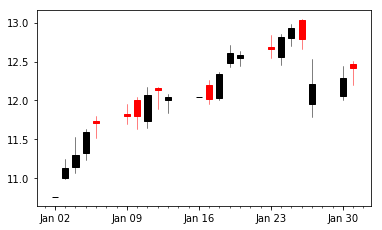

In [127]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax, value_tuples, width=0.6, colorup='k',colordown='r');

____________________________
### Daily percent change ###

In [128]:
df1['returns'] = df1['Close'].pct_change()  # default shift = 1, ie daily return for this data
df2['returns'] = df2['Close'].pct_change()
df3['returns'] = df3['Close'].pct_change()

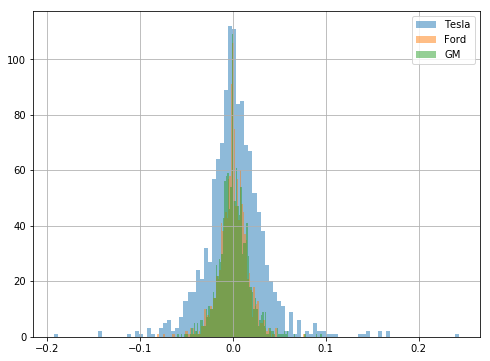

In [130]:
df1['returns'].hist(bins=100, label='Tesla', figsize=(8,6), alpha=0.5)
df2['returns'].hist(bins=100, label='Ford', alpha=0.5)
df3['returns'].hist(bins=100, label='GM', alpha=0.5)
plt.legend();

#### KDE Plot ####
In the long run, all 3 stocks' daily return looks so symmetric!!!!

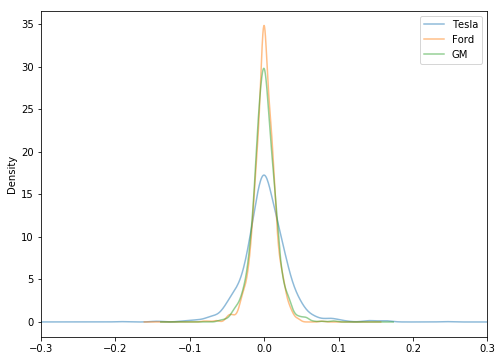

In [132]:
df1['returns'].plot(kind='kde', label='Tesla', figsize=(8,6), alpha=0.5)
df2['returns'].plot(kind='kde', label='Ford', alpha=0.5)
df3['returns'].plot(kind='kde', label='GM', alpha=0.5)
plt.legend();
plt.xlim(-0.3, 0.3);

** Try also creating some box plots comparing the returns. **

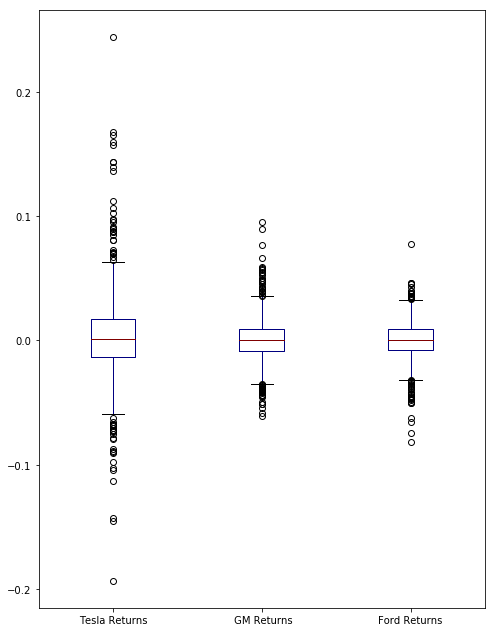

In [135]:
box_df = pd.concat([df1['returns'],df3['returns'],df2['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet');

### Comparing Daily returns between stocks with scatter_matrix ###

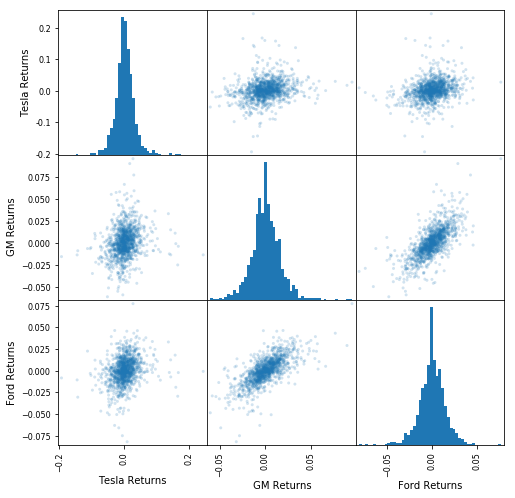

In [136]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

_____________
** Cumulative returns: df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod() **

In [137]:
df1['Cumulative Return'] = (1+df1['returns']).cumprod()
# df1.head()
df2['Cumulative Return'] = (1+df2['returns']).cumprod()
df3['Cumulative Return'] = (1+df3['returns']).cumprod()

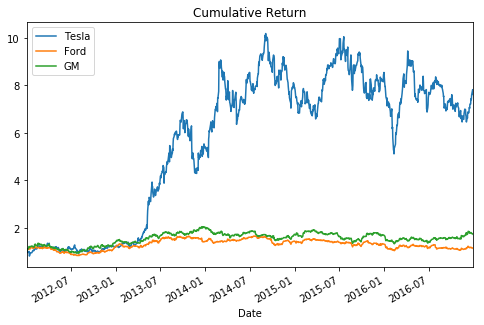

In [138]:
df1.dropna()['Cumulative Return'].plot(figsize=(8,5), title='Cumulative Return', label='Tesla')
df2.dropna()['Cumulative Return'].plot(label='Ford')
df3.dropna()['Cumulative Return'].plot(label='GM')
plt.legend();